<a href="https://colab.research.google.com/github/ousidus/fake_news_detection/blob/main/fake_news_detection_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv('news.csv')

In [ ]:
duplicates = data.duplicated()

if duplicates.any():
    duplicate_rows = data[duplicates]
    print("Znalezione zduplikowane wiersze:")
    print(duplicate_rows)
else:
    print("Brak zduplikowanych wierszy.")

Brak zduplikowanych wierszy.


In [ ]:
print('Dimension of dataset: ', data.shape)
print('Attributes in the dataset: ', data.columns.values)
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['label'])

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import re
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('/content/drive/MyDrive/news.csv')

max_sequence_length = 128

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_inputs_title = []
val_inputs_title = []
test_inputs_title = []

train_data, remaining_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42, stratify=remaining_data['label'])

for _, data_row in train_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    title_tokens = tokenizer.encode(text, add_special_tokens=True, max_length=max_sequence_length, truncation=True)
    title_padding_length = max_sequence_length - len(title_tokens)
    title_tokens += [0] * title_padding_length
    train_inputs_title.append(title_tokens)

for _, data_row in val_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    title_tokens = tokenizer.encode(text, add_special_tokens=True, max_length=max_sequence_length, truncation=True)
    title_padding_length = max_sequence_length - len(title_tokens)
    title_tokens += [0] * title_padding_length
    val_inputs_title.append(title_tokens)

for _, data_row in test_data.iterrows():
    text = data_row['title'] + '. ' + data_row['text']
    title_tokens = tokenizer.encode(text, add_special_tokens=True, max_length=max_sequence_length, truncation=True)
    title_padding_length = max_sequence_length - len(title_tokens)
    title_tokens += [0] * title_padding_length
    test_inputs_title.append(title_tokens)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
data.loc[data['label']=='FAKE']

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [ ]:
label_encoder = LabelEncoder()
train_labels = torch.tensor(label_encoder.fit_transform(train_data['label']))
test_labels = torch.tensor(label_encoder.transform(test_data['label']))

train_inputs_title = torch.tensor(train_inputs_title)
test_inputs_title = torch.tensor(test_inputs_title)

train_dataset = TensorDataset(train_inputs_title, train_labels)
test_dataset = TensorDataset(test_inputs_title, test_labels)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
label_encoder = LabelEncoder()
train_labels = torch.tensor(label_encoder.fit_transform(train_data['label']))
test_labels = torch.tensor(label_encoder.transform(test_data['label']))

train_inputs_title = torch.tensor(train_inputs_title)
test_inputs_title = torch.tensor(test_inputs_title)

train_dataset = TensorDataset(train_inputs_title, train_labels)
test_dataset = TensorDataset(test_inputs_title, test_labels)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classifier_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

optimizer = AdamW(classifier_model.parameters(), lr=1e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model.to(device)

epochs = 5

for epoch in range(epochs):
    classifier_model.train()
    total_loss = 0

    for batch in train_dataloader:
        inputs_title, labels = batch
        inputs_title, labels = inputs_title.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = classifier_model(inputs_title, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {average_loss}')

classifier_model.eval()
true_labels = []
predicted_labels = []

for batch in test_dataloader:
    inputs_title, labels = batch
    inputs_title, labels = inputs_title.to(device), labels.to(device)

    with torch.no_grad():
        outputs = classifier_model(inputs_title)

    logits = outputs.logits
    _, predicted = torch.max(logits, 1)

    true_labels.extend(labels.cpu().numpy())
    predicted_labels.extend(predicted.cpu().numpy())

print(classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


KeyboardInterrupt: 

In [ ]:
val_inputs_title = torch.tensor(val_inputs_title)
val_labels = torch.tensor(label_encoder.transform(val_data['label']))

val_dataset = TensorDataset(val_inputs_title, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

classifier_model.eval()
val_true_labels = []
val_predicted_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        inputs_title, labels = batch
        inputs_title, labels = inputs_title.to(device), labels.to(device)

        outputs = classifier_model(inputs_title)
        logits = outputs.logits
        _, predicted = torch.max(logits, 1)

        val_true_labels.extend(labels.cpu().numpy())
        val_predicted_labels.extend(predicted.cpu().numpy())

print("Validation Classification Report:")
print(classification_report(val_true_labels, val_predicted_labels, target_names=label_encoder.classes_))

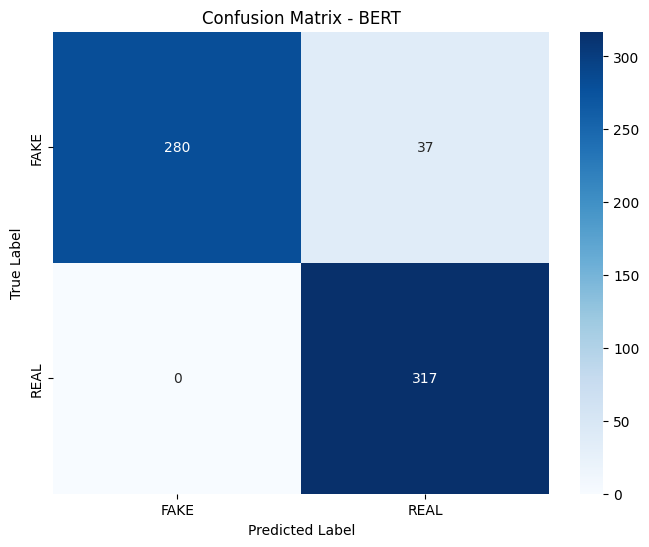

Classification Report:
               precision    recall  f1-score   support

        FAKE       1.00      0.88      0.94       317
        REAL       0.90      1.00      0.94       317

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_predictions(model, dataloader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs, labels=labels)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_predictions

true_labels, predicted_labels = get_predictions(classifier_model, test_dataloader)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - BERT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

class_report = classification_report(true_labels, predicted_labels, target_names=list(map(str, label_encoder.classes_)))
print("Classification Report:\n", class_report)


In [ ]:
import pickle

#pickle.dump(classifier_model, open('bert.pkl', 'wb'))
model = pickle.load(open('/content/modele/bert.pkl', 'rb'))

In [ ]:
embeddings = []
model.config.output_hidden_states = True

model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch[0].to(device)
        outputs = model(input_ids)
        last_hidden_states = outputs.hidden_states[-1]
        embeddings.extend(last_hidden_states.mean(dim=1).cpu().numpy())


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


tsne = TSNE(n_components=2, random_state=42)
embeddings = np.stack(embeddings)
embeddings_reduced = tsne.fit_transform(embeddings)
embeddings_reduced

array([[-22.532139 ,  -6.7979703],
       [ 23.724155 ,   7.1762395],
       [  5.0579576,  -4.3727927],
       ...,
       [-27.332579 ,  -7.404382 ],
       [  8.547789 ,  28.763449 ],
       [-17.357468 , -11.889755 ]], dtype=float32)

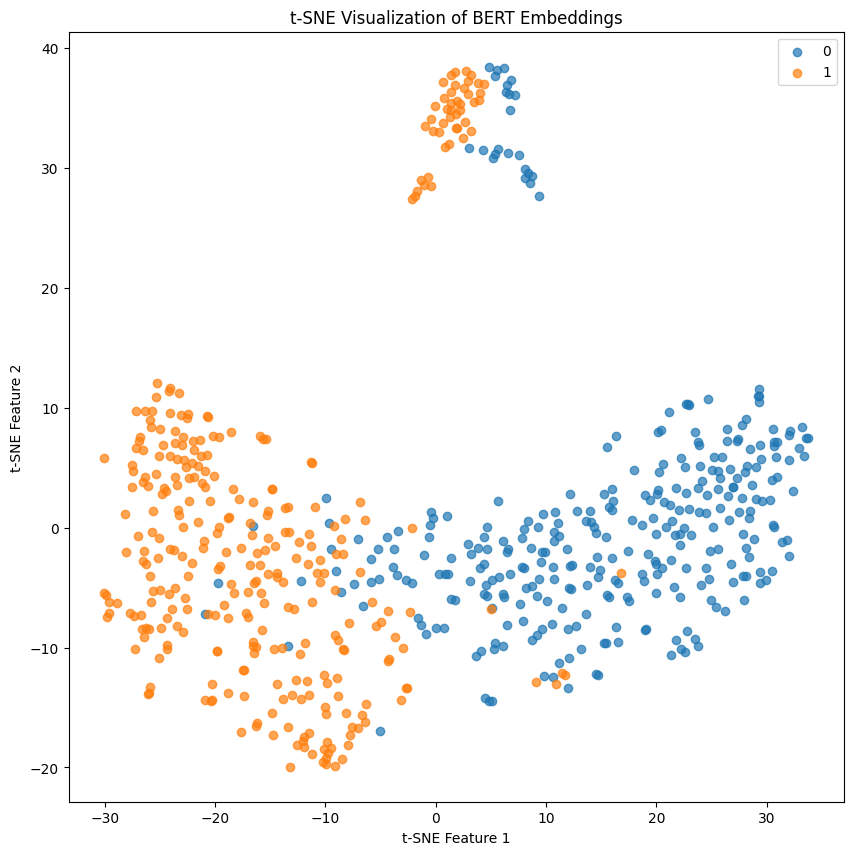

In [ ]:

true_labels = []
predictions = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch[0].to(device)
        labels = batch[1]
        outputs = model(input_ids)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

df = pd.DataFrame({
    'x': embeddings_reduced[:, 0],
    'y': embeddings_reduced[:, 1],
    'label': true_labels
})

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for label_class in np.unique(true_labels):
    plt.scatter(df[df.label == label_class].x, df[df.label == label_class].y, label=label_class, alpha=0.7)
plt.legend()
plt.title('t-SNE Visualization of BERT Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=fa25b41e298fe111fa49445914c1e8f6c126e5e2c91341cfa155f9aa1a7a8efb
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.1 MB/s eta 0:00:00


In [ ]:
import umap

embeddings = umap.UMAP(n_components=2, metric='minkowski').fit(test_inputs_title)
embeddings.embedding_

array([[ 9.66721  ,  7.085982 ],
       [ 8.237365 ,  6.7503705],
       [ 9.2760935,  5.7285132],
       ...,
       [ 9.5760565,  8.164193 ],
       [ 7.581825 ,  6.631955 ],
       [10.234906 ,  5.447783 ]], dtype=float32)

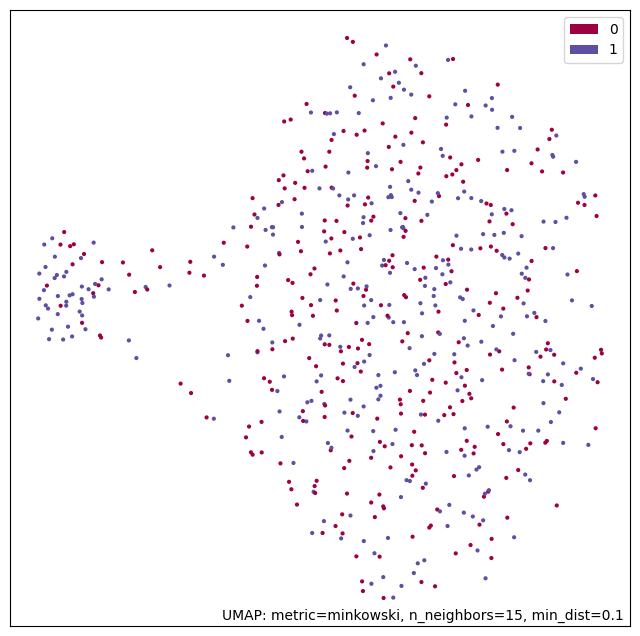

In [ ]:
import umap.plot
import numpy as np
f = umap.plot.points(embeddings, labels=np.stack(true_labels))

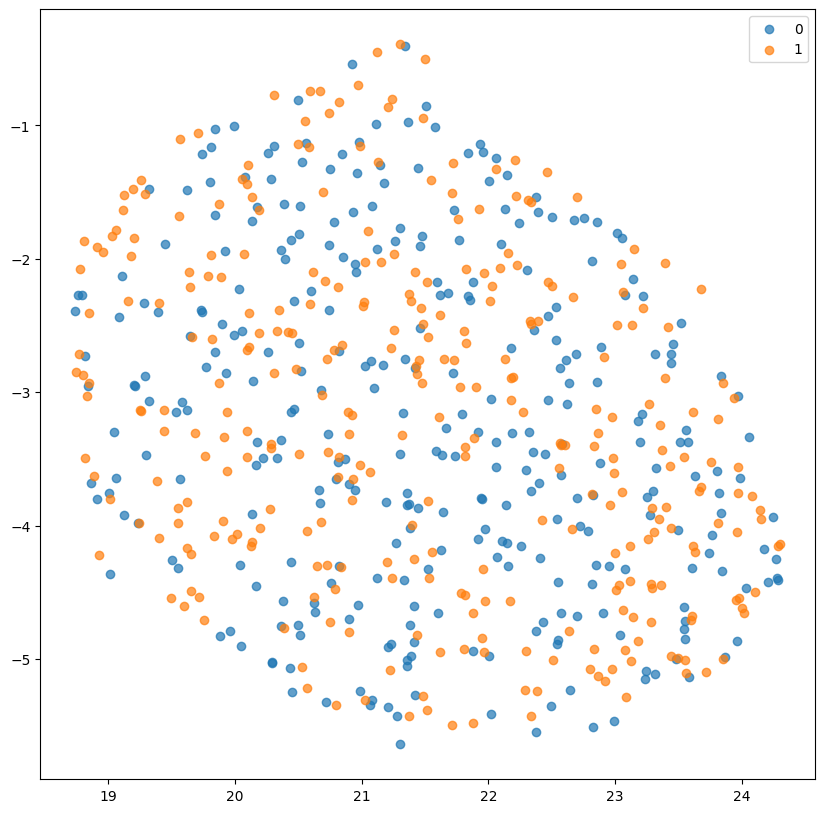

In [ ]:

df = pd.DataFrame({
    'x': embeddings.embedding_[:, 0],
    'y': embeddings.embedding_[:, 1],
    'label': true_labels
})
plt.figure(figsize=(10, 10))
for label_class in np.unique(true_labels):
    plt.scatter(df[df.label == label_class].x, df[df.label == label_class].y, label=label_class, alpha=0.7)
plt.legend()
plt.show()

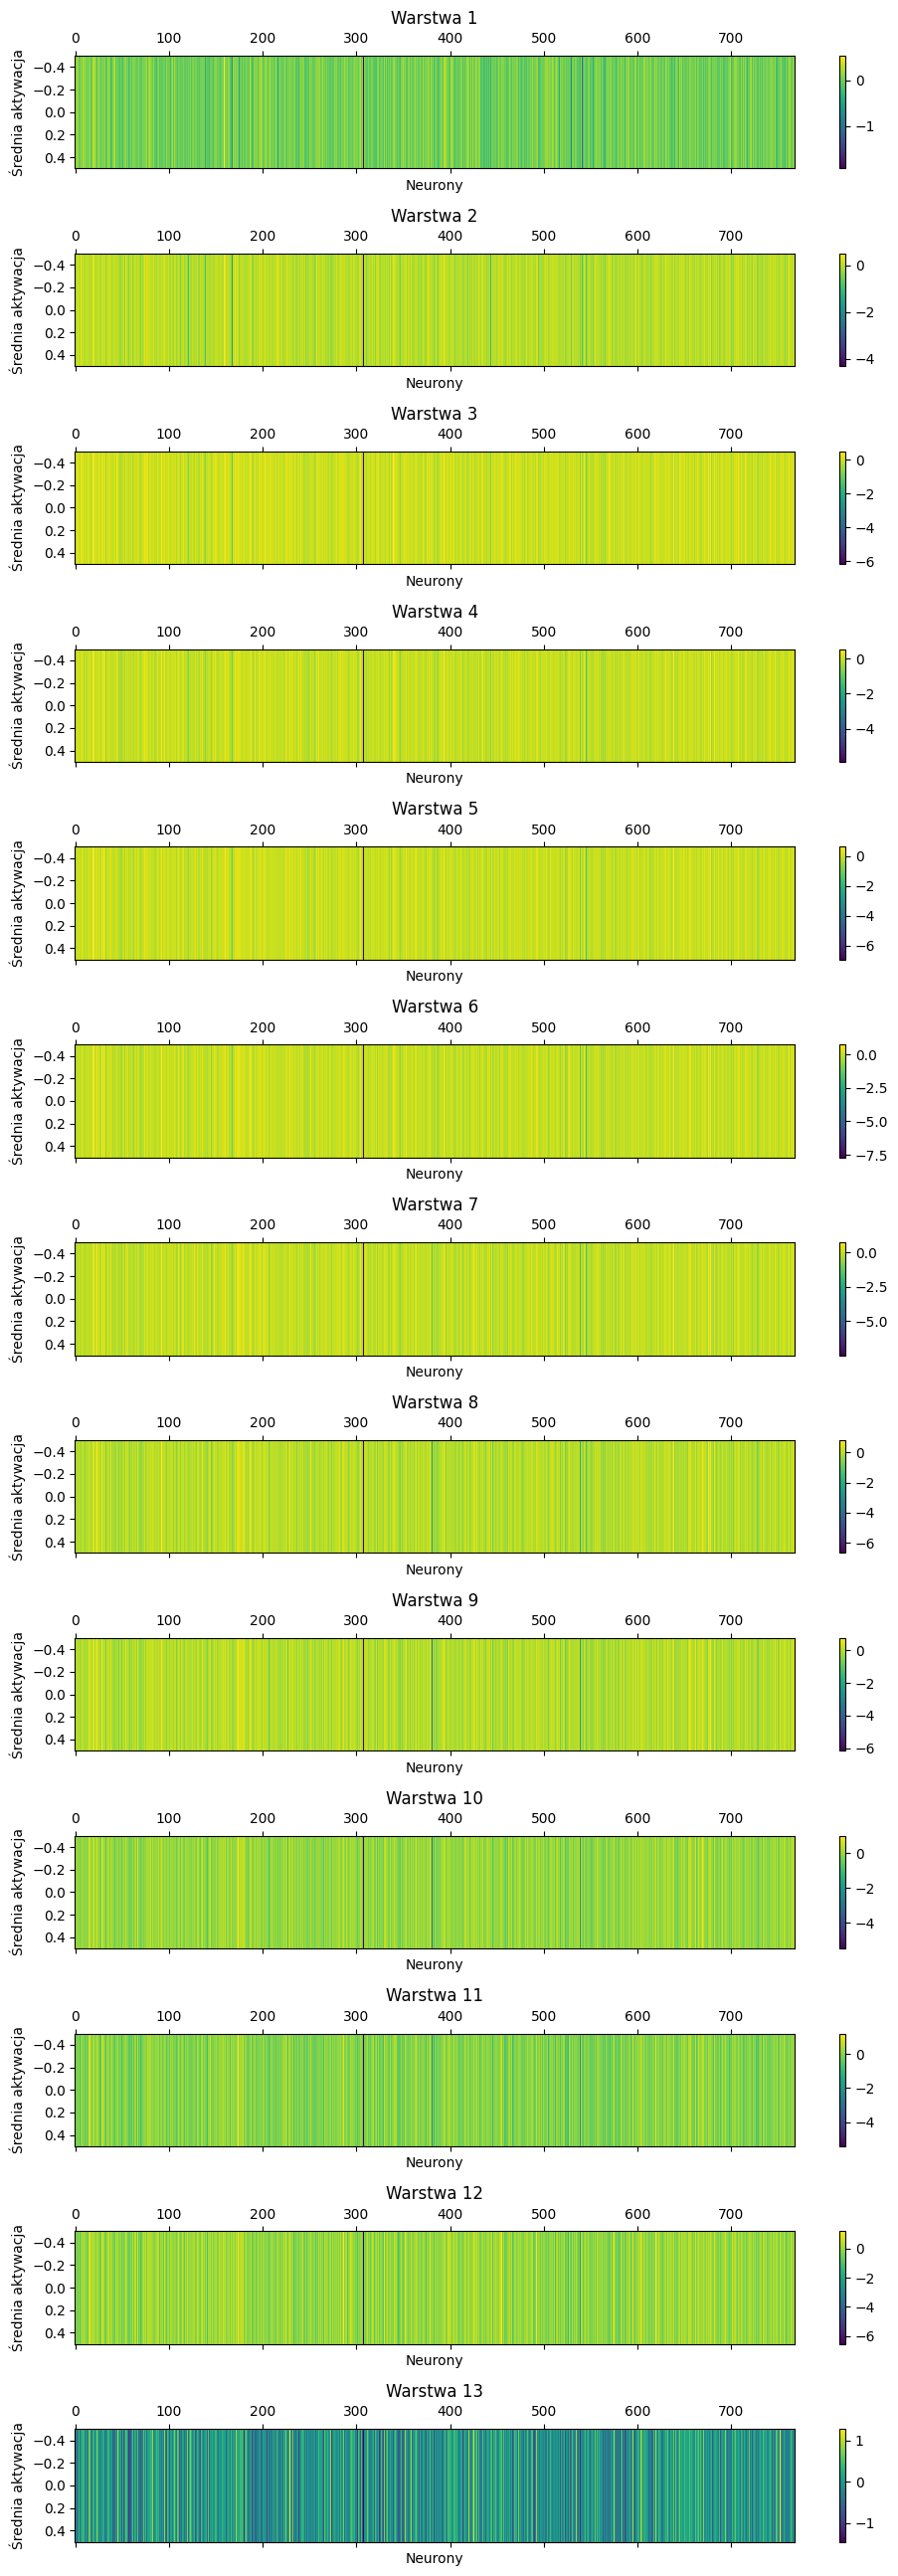

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model.config.output_hidden_states = True

all_layers_activations = []

model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch[0].to(device)
        outputs = model(input_ids)
        all_layers_activations.append(outputs.hidden_states)

num_layers = len(all_layers_activations[0])
fig, axes = plt.subplots(num_layers, 1, figsize=(10, num_layers * 2))

for i, layer_activations in enumerate(all_layers_activations[0]):
    sample_activation = layer_activations[0].cpu().numpy()
    mean_activation = sample_activation.mean(axis=0)
    ax = axes[i]
    cax = ax.matshow(mean_activation.reshape((1, -1)), cmap='viridis', aspect='auto')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'Warstwa {i+1}')
    ax.set_xlabel('Neurony')
    ax.set_ylabel('Średnia aktywacja')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

umap_data = pd.DataFrame({
    'UMAP Feature 1': embeddings_reduced[:, 0],
    'UMAP Feature 2': embeddings_reduced[:, 1],
    'text': test_data['title'] + '. ' + test_data['text'],
    'label': test_data['label']
})

fig = px.scatter(umap_data, x='UMAP Feature 1', y='UMAP Feature 2', color='label', hover_data=['text'])
fig.show()

In [ ]:
test_data

,Unnamed: 0,title,text,label
4613,2135,Climate-change deniers are in retreat,There is no denying it: Climate-change deniers...,REAL
5091,5558,Modi effect: Facebook to abolish fake troll ac...,Tweet (Image via intoday.in) \nJust as the Ind...,FAKE
5385,5756,Hillary Clinton FREAKED OUT Her Entire Campaig...,Pinterest \nIt was over a year ago that the Cl...,FAKE
5016,1184,What's Marco Rubio's strategy against Donald T...,Marco Rubio has been forced to speed up plans ...,REAL
3015,3580,Why does ISIS keep making enemies?,Peter Bergen is CNN's national security analys...,REAL
...,...,...,...,...
3278,1526,Week of Donald Trump-Hillary Clinton feud a ta...,Washington (CNN) Donald Trump's attacks agains...,REAL
275,854,Trump advisors try to pivot not fishtail,**Want FOX News First in your inbox every day?...,REAL
4964,2425,Obamacare on the line at SCOTUS,Washington (CNN) The future of health care in ...,REAL
4993,5343,10 Ways Russia is Preparing For World War 3,"October 31, 2016 at 6:54 am \nWhy can't we all...",FAKE


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp -r "//content/drive/MyDrive/modele" "/content/modele"